# <h1 style="text-align: center; text-decoration: underline">Exploring Hashtag Usage</h1>
<br>
<br>
><p style='font-size: large'>We'll take a look at the hashtags represented in the HT-full dataset. We'll split original tweets and retweets into two separate dataframes, so that we can compare them side by side in the paper</p>

### Import the Packages We'll be Using & Set Some Formatting Options


In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
from pylab import *

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
# adjusts default size of graphs
plt.rcParams['figure.figsize'] = (15, 5)

<br>
## Read in the Data & Separate Original Tweets from Retweets
<br>

In [9]:
# Read in the pkl & begin 
df = pd.read_pickle('a_HT.pkl')

In [10]:
print "Number of cases:", len(df)
df.head(2)

Number of cases: 7669


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
0,2546,%2523montanamoment,8.550000e+17,35:55.8,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Fri Apr 21 05:32:02 +0000 2017,D,RT @LeonKauffman: The night sky is a fascinati...,J_M1812,2.455702e+08,261,691,10,2061,"Writer, editor, aspiring photographer. Native ...",Montana,Tue Feb 01 00:22:51 +0000 2011,4,NaN,0,MontanaMoment,1,LeonKauffman,1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{u'contributors': None, u'truncated': False, u...",NaN,NaN,NaN,NaN,0,0,0
1,2547,%2523montanamoment,8.550000e+17,35:56.2,0,en,0.0,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Fri Apr 21 05:15:37 +0000 2017,15:37.0,RT @visitmontana: Take time for reflection. #M...,kari_tirrell,2.531729e+09,203,190,1,263,NaN,NaN,Thu May 29 04:54:48 +0000 2014,45,NaN,0,MontanaMoment,1,visitmontana,1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/visitmontana/status/854378...,http://pbs.twimg.com/media/C9tc6RFVwAAJLxO.jpg,photo,0,0,0


In [11]:
# The retweeted_status variable of the dataset is binary in that it contains either the string 'THIS IS A RETWEET' or the nan (not a number) value, meaning that a tweet is not a retweet
pd.unique(df.retweeted_status.ravel())

array(['THIS IS A RETWEET --> DOUBLE-CHECK JSON', nan], dtype=object)

In [12]:
# by default, the dropna parameter of the count command (pandas Series) is true, meaning all NaN values are not included in 
# the resulting object. Here, we see that the majority of the 'visitMontana' tweets are retweets

print "Of ", str(len(df)), " tweets, ", str(df.retweeted_status.count()), " are retweets."
print str(len(df) - df.retweeted_status.count()), " are not retweets"

print "That is, " + str(round(100*(df.retweeted_status.count()/float(len(df))), 1)) + "% of the hashtag tweets are retweets"

Of  7669  tweets,  5482  are retweets.
2187  are not retweets
That is, 71.5% of the hashtag tweets are retweets


In [13]:
df_original = df[df['retweeted_status'] != 'THIS IS A RETWEET --> DOUBLE-CHECK JSON'] # create new df w/ only original tweets
print len(df), "total tweets"
print len(df_original), "original tweets"
print len (df) - len(df_original), "total retweets"
df_original.head(2)

7669 total tweets
2187 original tweets
5482 total retweets


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
9,2555,%2523montanamoment,8.550000e+17,35:57.3,0,en,0.0,NaN,NaN,Fri Apr 21 04:21:17 +0000 2017,21:17.0,The night sky is a fascinating place especiall...,LeonKauffman,425125748.0,673,152,39,1616,"Hydrologist, photographer, fan of Drexel baske...","Condon, Montana, USA",Wed Nov 30 15:58:25 +0000 2011,4,NaN,0,MontanaMoment,1,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/LeonKauffman/status/855275...,http://pbs.twimg.com/media/C96LaxcUQAEMOQl.jpg,photo,0,0,0
10,2556,%2523montanamoment,8.550000e+17,35:57.7,0,en,0.0,NaN,NaN,Fri Apr 21 03:15:27 +0000 2017,15:27.0,Nick's view of the #sunset from Sunset Bench i...,ErinWx,163660638.0,632,243,47,10327,Chief Meteorologist for CBS affiliate KPAX-TV ...,"Missoula, MT",Wed Jul 07 00:05:20 +0000 2010,0,NaN,0,"sunset, Bitterroot, mtwx, Montana, MontanaMoment",5,NaN,0,NaN,NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/ErinWx/status/855258652323...,http://pbs.twimg.com/media/C959NaAXcAAuGyH.jpg,photo,0,0,0


In [14]:
# drop exception_mag cases due to their outlier status (no retweets, 318 cases; see paper for more info)

df_original = df_original[df_original['from_user_screen_name'] != 'TheExceptionMag']
print "The new N is", len(df_original)

The new N is 1869


In [15]:
# save this df to import later
# df_original.to_pickle('a_HT_no_retweets.pkl')

<br>
## Analyzing Hashtags as part of RQ1:
<br>
><p style='font-size: large'>Now that we have a dataset that contains only original tweets, excluding exception_mag (n=1,869), we can explore how hashtags are used among those cases that we will be including in the regression analyses estimating predicted retweets.

In [16]:
# entitties_hashtags_count is created from the Twitter API's entities_hashtags variable, which includes all hashtags included
# in each tweet. entities_hashtags_count is the count of tweets in each hashtag

df_original['entities_hashtags_count'].describe()

count    1869.000000
mean        3.235955
std         2.268505
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        12.000000
Name: entities_hashtags_count, dtype: float64

In [17]:
print "So, our", len(df_original), "tweets contain an average of", round(df_original['entities_hashtags_count'].mean(), 2), "hashtags."

So, our 1869 tweets contain an average of 3.24 hashtags.


><p style='font-size:large'>However, the high standard deviation suggests that this average doesn't provide a full picture of centrality. Plotting the frequency of hashtag_count below shows that the use of a single hashtag is by far the most popular</p>
</br>
><p>Note: since the tweets are selected based on inclusion of the hashtag 'MontanaMoment', the 1 category in the chart below are those tweets that only use the hashtag of interest</p>

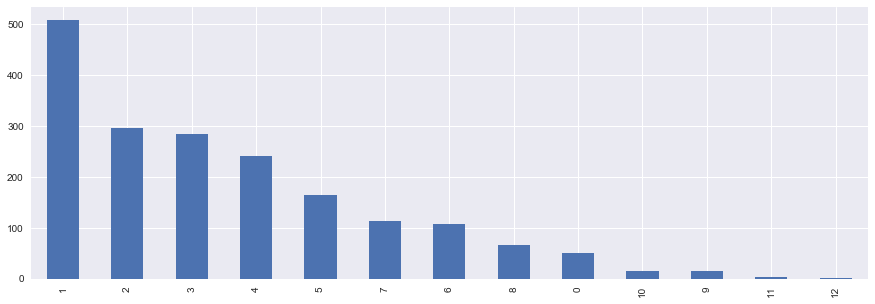

In [18]:
df_original['entities_hashtags_count'].value_counts().plot(kind='bar')

In [19]:
print "There are only", len(pd.unique(df_original.from_user_screen_name.ravel())), "unique users in df_original"
print "In contrast, there are", len(pd.unique(df.from_user_screen_name.ravel())), "users in the full df"
print "\nIt appears a smaller percentage of regular users drive traffic."

There are only 545 unique users in df_original
In contrast, there are 3100 users in the full df

It appears a smaller percentage of regular users drive traffic.


In [20]:
# Quick view of the entities_hashtags variable

df_original['entities_hashtags'].head()

9                                         MontanaMoment
10     sunset, Bitterroot, mtwx, Montana, MontanaMoment
11     sunset, Bitterroot, mtwx, Montana, MontanaMoment
22    montanamoment, lastbestbox, montana, montanahi...
24                                        MontanaMoment
Name: entities_hashtags, dtype: object

In [21]:
print "unique hashtags are different between datasets: ", len(pd.unique(df.entities_hashtags.ravel())) != len(pd.unique(df_original.entities_hashtags.ravel()))
print "There are ", len(pd.unique(df.entities_hashtags.ravel())) - len(pd.unique(df_original.entities_hashtags.ravel())), " fewer hashtags in the dataset without retweets (df_original)"

unique hashtags are different between datasets:  True
There are  78  fewer hashtags in the dataset without retweets (df_original)


### By usage numbers:
   ><p>    First, we'll create a list of all the hashtags, count how many times each is used based on values, generate percentages for how frequently most hashtags are used, and create a graph of the top ten hashtags to include in the paper.

In [22]:
# loops through the entities_hashtags variable. If cell != empty, separate hashtags, add # to beginning, remove
# commas from end, make everything lowercase, add formated tag to list [original function thanks to gdSaxton @ https://github.com/gdsaxton/PANDAS]

hashtag_list = []                          #CREATE EMPTY LIST 
for i in df_original.entities_hashtags:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if pd.notnull(i):                      #IF CELL NOT EMPTY
        tags = i.split()                   #SPLIT EACH CELL INTO SEPARATE HASHTAGS
        for t in tags:                     #FOR EACH TAG IN THE CELL
            t = "#"+t                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            hashtag_list.append(t)         #ADD TAG TO OUR LIST
print len(hashtag_list)                    #PRINT NUMBER OF ITEMS IN OUR LIST
hashtag_list[:5]                          #SHOW THE FIRST 10 ITEMS OF THE LIST

6048


['#montanamoment', '#sunset', '#bitterroot', '#mtwx', '#montana']

In [23]:
# convert to a pandas Series object to use value_counts() function to count the values for each hashtag

Series(hashtag_list).value_counts()

#montanamoment         1738
#montana                669
#photography            104
#bozeman                102
#bozemanmontana          73
#homeimprovementsmt      73
#mtwx                    72
#missoula                58
#birds                   51
#winter                  49
#bigskycountry           47
#travel                  47
#sunrise                 46
#wildlife                40
#msu                     40
#sunset                  40
#nature                  34
#mountains               31
#optoutside              28
#snow                    28
#spring                  26
#wildandfree             25
#bitterroot              23
#bigsky                  21
#glaciermt               20
#longearedowl            19
#owls                    18
#ski                     17
#clouds                  16
#adventure               16
                       ... 
#nationalforest           1
#negotiation              1
#registered               1
#snowangel                1
#goldenbears        

In [24]:
# we have 1,272 hashtags in the hash_cnt df (less than the 'count' of hashtags, because these are separated by unique value)

hash_cnt = DataFrame(Series(hashtag_list).value_counts())
hash_cnt.columns = ['tag_cnt']
print len(hash_cnt)
hash_cnt

1272


,tag_cnt
#montanamoment,1738
#montana,669
#photography,104
#bozeman,102
#bozemanmontana,73
#homeimprovementsmt,73
#mtwx,72
#missoula,58
#birds,51
#winter,49


In [25]:
# hash_cnt.to_csv('HT_no_retweets_hash_cnt.csv')

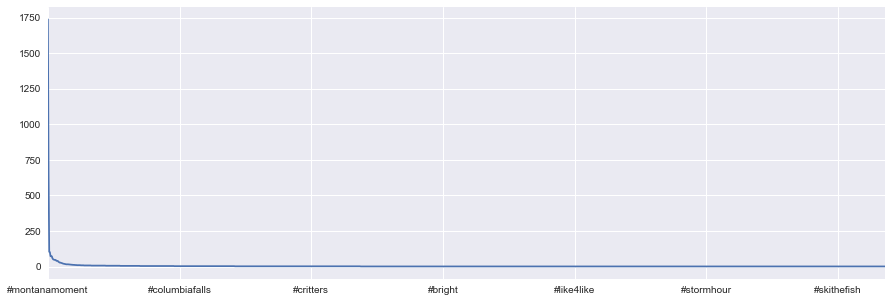

In [26]:
# looks like the hashtags are not normally distributed
# see https://en.wikipedia.org/wiki/Power_law
hash_cnt['tag_cnt'].plot()

In [27]:
# value_counts() shows the number of times each hashtag is used. The normalize parameter displays the percentage
# i.e., 63% of the hashtags are used only once & 15 percent are used only twice. Only 7% are used thrice. less than 1% are used
# more than 8 times

hash_cnt['tag_cnt'].value_counts(normalize=True)

1       0.626572
2       0.150157
3       0.072327
4       0.040881
5       0.023585
6       0.017296
7       0.017296
8       0.008648
10      0.004717
9       0.003931
16      0.003145
40      0.002358
11      0.002358
12      0.002358
73      0.001572
47      0.001572
28      0.001572
13      0.001572
14      0.001572
15      0.001572
17      0.000786
1738    0.000786
18      0.000786
46      0.000786
104     0.000786
102     0.000786
72      0.000786
58      0.000786
51      0.000786
49      0.000786
34      0.000786
19      0.000786
31      0.000786
26      0.000786
25      0.000786
23      0.000786
21      0.000786
669     0.000786
20      0.000786
Name: tag_cnt, dtype: float64

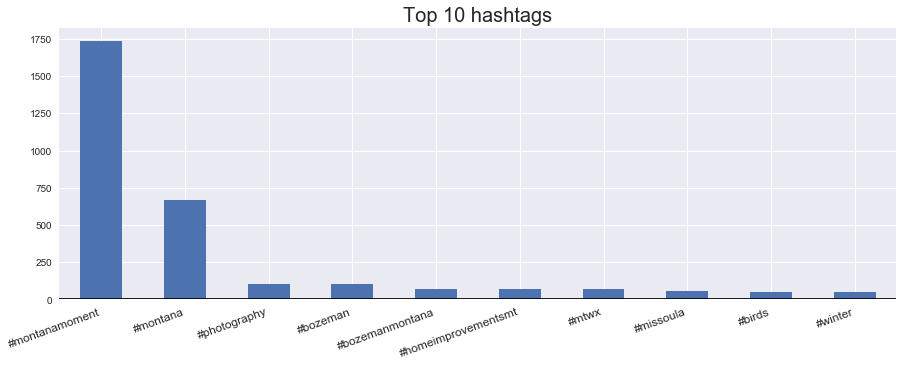

In [28]:
# among the original tweets, 'montana' is used frequently in association with 'montanamoment', but there are no other strong patterns

hash_cnt['tag_cnt'][:10].plot(kind='bar')
axhline(0, color='k')
title('Top 10 hashtags', fontsize=20)
xticks(fontsize = 12,rotation = 20, ha='right')
# savefig('graph_HT_hashtags_no_retweets_top_ten_hashtags.png', bbox_inches='tight', dpi=300, format='png')
show()

In [29]:
# not a ton of useful info here, but we see fairly quickly the hashtags more often associated with montanamoment, 
# other than 'montana' it is mostly city names and various nature keywords. More visually intuitive than a bar graph,
# though, I wouldn't expect to see this in a scholarly publication. Thoughts?

<br>
<br>
<br>
<br>
<br>
# Now, Let's do the same analysis using only retweets. 
------

>The easiest way to do this is by modifying which dataframe is imported in the beginning of the script. If you would like to recreate this with another file, you would simply insert your file in the dataframe assignment  `df_new = pd.read_pickle('your_version_here.pkl')`
<br><br>
This is how we'll analyze hashtags for the retweets below. Since we have markdown cells & other study-specific informating hard-coded into these scripts, it makes sense to present all the information independently. This also releases others from the burden of downloading Jupyter, modifying, and testing scripts to recreate aspects of the study. 
<br><br>
However, the point is that the power of creating scripts such as this is that any version of the dataset (if it has the same variables called, etc.) can be tested according to specifications previously created. Jupyter notebooks are particularly useful for the ability to style the presentation, and in allowing non-technical users to view the research processes without needing to run a script.



## Hashtags represented in the dataset (Retweets only)

<br>
><p style='font-size: medium; '>It will be useful to get a sense of which/how many hashtags are used in conjunction with *#MontanaMoment*. Of particular interest is whether or not there is any great divergence in hashtag use between original tweets and retweets. If there are only minimal differences, there will be more justification for focusing primarily on original tweets in trying to determine the characteristics of the electronic word-of-mouth associated with Montana as a tourist destination.</p> 
<br><br>
<p style='font-size: medium'>We've already imported the packages we'll use & we already have the dataframe we'll use to create the retweets (`df`). Just like we built `df_original` from `df`, we'll create `df_retweets` to isolate retweets from original tweets</p>

In [31]:
# verify that we have the right df:
print len(df), 'cases'
df.head(1)

7669 cases


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
0,2546,%2523montanamoment,8.550000e+17,35:55.8,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Fri Apr 21 05:32:02 +0000 2017,D,RT @LeonKauffman: The night sky is a fascinati...,J_M1812,245570167.0,261,691,10,2061,"Writer, editor, aspiring photographer. Native ...",Montana,Tue Feb 01 00:22:51 +0000 2011,4,NaN,0,MontanaMoment,1,LeonKauffman,1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{u'contributors': None, u'truncated': False, u...",NaN,NaN,NaN,NaN,0,0,0


In [32]:
df_retweets = df[df['retweeted_status'] == 'THIS IS A RETWEET --> DOUBLE-CHECK JSON']
print len(df)
print len(df_retweets)
print len (df) - len(df_retweets)
df_retweets.head(1)

7669
5482
2187


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
0,2546,%2523montanamoment,8.550000e+17,35:55.8,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Fri Apr 21 05:32:02 +0000 2017,D,RT @LeonKauffman: The night sky is a fascinati...,J_M1812,245570167.0,261,691,10,2061,"Writer, editor, aspiring photographer. Native ...",Montana,Tue Feb 01 00:22:51 +0000 2011,4,NaN,0,MontanaMoment,1,LeonKauffman,1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{u'contributors': None, u'truncated': False, u...",NaN,NaN,NaN,NaN,0,0,0


### We now have the three dataframes used in the hashtag comparisons:

In [37]:
print 'df:', len(df), 'cases'
print 'df_original:', len(df_original), 'cases'
print 'df_retweets:', len(df_retweets), 'cases' # since exception_mag has no retweets, there are no cases to drop from df_retweets

df: 7669 cases
df_original: 1869 cases
df_retweets: 5482 cases


In [38]:
# save this df to import later
#df_retweets.to_pickle('a_HT_retweetsONLY.pkl')

### Let's examine the hashtag characteristics of our retweet-only dataframe

In [40]:
# entitties_hashtags_count is created from the Twitter's entities_hashtags variable, which includes all hashtags included
# in each tweet. entities_hashtags_count is the count of tweets in each hashtag


df_retweets['entities_hashtags_count'].describe()

count    5482.000000
mean        1.778366
std         1.417545
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: entities_hashtags_count, dtype: float64

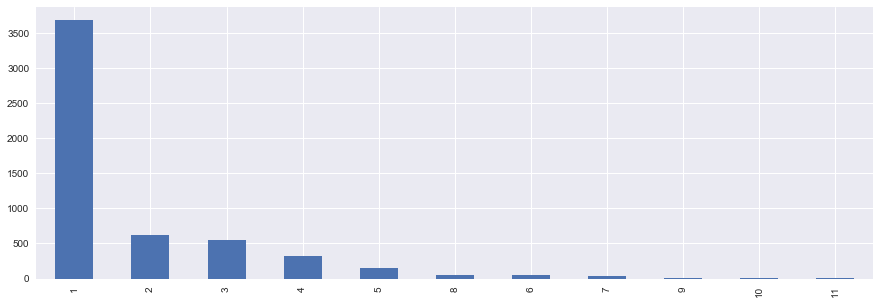

In [42]:
# frequency of number of hashtags used in each retweet 

# a single hashtag is still the most popular (no surprises since tweet selection is predicated on the inclusion of #MontanaMoment)

df_retweets['entities_hashtags_count'].value_counts().plot(kind='bar')

In [44]:
print "There are only ", len(pd.unique(df_retweets.from_user_screen_name.ravel())), " unique users in df_retweets"
print "There are", len(pd.unique(df.from_user_screen_name.ravel())), "users in the full df"

There are only  2645  unique users in df_retweets
There are 3100 users in the full df


In [45]:
# loops through the entities_hashtags variable. If cell != empty, separate hashtags, add # to beginning, remove
# commas from end, make everything lowercase, add formated tag to list

# we have a total of 9,749 hashtags

hashtag_list = []                          #CREATE EMPTY LIST 
for i in df_retweets.entities_hashtags:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if pd.notnull(i):                      #IF CELL NOT EMPTY
        tags = i.split()                   #SPLIT EACH CELL INTO SEPARATE HASHTAGS
        for t in tags:                     #FOR EACH TAG IN THE CELL
            t = "#"+t                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            hashtag_list.append(t)         #ADD TAG TO OUR LIST
print len(hashtag_list)                    #PRINT NUMBER OF ITEMS IN OUR LIST
hashtag_list[:10]                          #SHOW THE FIRST 10 ITEMS OF THE LIST

9749


['#montanamoment',
 '#montanamoment',
 '#montanamoment',
 '#montanamoment',
 '#montanamoment',
 '#montanamoment',
 '#montanamoment',
 '#snow',
 '#spring',
 '#montanamoment']

In [49]:
# convert to a pandas Series object to use value_counts() function to count the values for each hashtag

# Of those 9,749 hashtags (426 unique), we see the ones used the most

hash_cnt = DataFrame(Series(hashtag_list).value_counts())
hash_cnt.columns = ['tag_cnt']
print len(hash_cnt)
hash_cnt

426


,tag_cnt
#montanamoment,5482
#montana,646
#phenomonal,143
#missoula,119
#winter,115
#calminthestorm,112
#snowywalks,112
#photography,103
#canonphotography,87
#mikewilliamsphotography,78


In [50]:
# we can save this for later manipulation as we have been doing:
# hash_cnt.to_csv('HT_no_retweets_hash_cnt.csv')

#### looks like the hashtags for the retweets are not normally distributed
  see (https://en.wikipedia.org/wiki/Power_law)

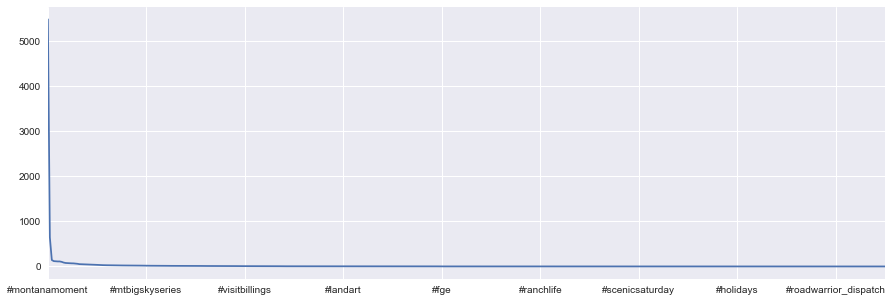

In [52]:
hash_cnt['tag_cnt'].plot()

#### We can dive a bit deeper using `value_counts` to see how often a hashtag is used
The normalize parameter displays the percentage
For example, 39% of the hashtags are used only once & 13 percent are used only twice.

In [56]:
hash_cnt['tag_cnt'].value_counts(normalize=True)

1       0.399061
2       0.133803
3       0.082160
4       0.072770
5       0.032864
12      0.023474
9       0.021127
7       0.018779
11      0.016432
8       0.016432
6       0.016432
14      0.011737
17      0.011737
22      0.009390
13      0.007042
15      0.007042
18      0.007042
21      0.007042
10      0.004695
27      0.004695
20      0.004695
25      0.004695
26      0.004695
28      0.004695
112     0.004695
39      0.004695
34      0.002347
52      0.002347
646     0.002347
119     0.002347
115     0.002347
103     0.002347
87      0.002347
78      0.002347
75      0.002347
71      0.002347
70      0.002347
69      0.002347
65      0.002347
60      0.002347
16      0.002347
31      0.002347
50      0.002347
49      0.002347
19      0.002347
45      0.002347
43      0.002347
42      0.002347
23      0.002347
24      0.002347
38      0.002347
37      0.002347
143     0.002347
30      0.002347
5482    0.002347
Name: tag_cnt, dtype: float64

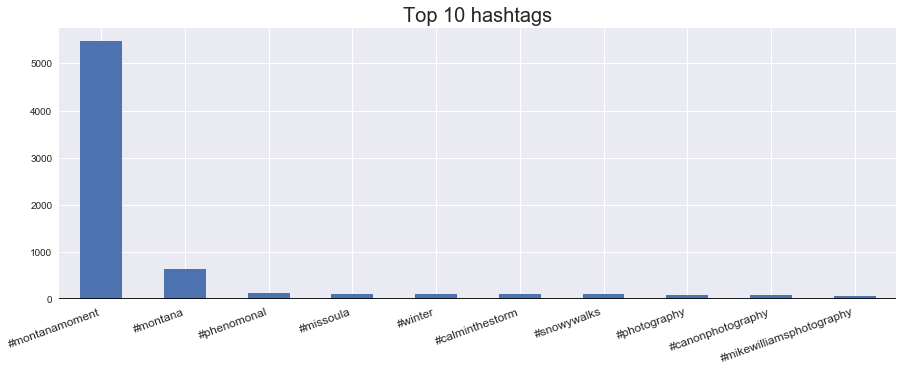

In [57]:
hash_cnt['tag_cnt'][:10].plot(kind='bar')
axhline(0, color='k')
title('Top 10 hashtags', fontsize=20)
xticks(fontsize = 12,rotation = 20, ha='right')

#savefig('graph_HT_hashtags_top_ten_hashtags.png', bbox_inches='tight', dpi=300, format='png')
show()

<br><br>
>### That's all for now! Next we'll begin preparing the data by creating and refining variables for use in the regression analyses
